# Fit Varshni dei picchi QD

In [83]:
from picchi_GaAs import raccoglitore_2 # picchi reference
from QM2.varshni_subroutines import *

d_o_emi = ['0', '0o5', '1', '1o5', '2', '2o5', '3']#, '3o5']
d_o_ass = ['0', '1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [84]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [85]:
for ass in d_o_ass:
    
    ass = 'ass=' + ass
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        emi = 'emi=' + emi
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            # ----------------------------------
            # la regione di sx richiede attenzione particolare:
            # può capitare che ci sia un picco fittizio tra sx1 e sx2
            # può capitare anche che ci sia solo il picco sx2
            if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                    picco_sx_1 = 0
                    picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                else:
                    picco_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                    picco_sx_2 = 0 
            
            elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                picco_sx_1 = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                # se sono tre allora c'è sicuramente il pezzotto in mezzo
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 3:
                    picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][2][0]
                # se sono due si deve verificare che il secondo sia nel posto giusto
                elif len(raccoglitore_2[ass][emi][i]['Regione 1']) == 2:
                    if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][1][0] < 800:
                        picco_sx_2 = raccoglitore_2[ass][emi][i]['Regione 1'][1][0]
                    else:
                        picco_sx_2 = 0
            else:
                picco_sx_1 = 0
                picco_sx_2 = 0
                
            # CI VUOLE UNA CURA PARTICOLARE PER LA REGIONE 2
            '''if len(raccoglitore_2[ass][emi][i]['Regione 2']) == 1:
                picco_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]
                picco_dx_2 = 0
            elif len(raccoglitore_2[ass][emi][i]['Regione 2']) > 1:
                picco_dx_1 = raccoglitore_2[ass][emi][i]['Regione 2'][0][0]          
                picco_dx_2 = raccoglitore_2[ass][emi][i]['Regione 2'][1][0]
            else:
                picco_dx_1 = 0
                picco_dx_2 = 0'''
            # il più alto, ultimo elemento di help, è sempre il picco bulk
            help = sorted(raccoglitore_2[ass][emi][i]['Regione 2'], key=lambda x: x[3])
            
            # Caso con due elementi: il picco fisso è sempre l'ultimo
            if len(help) == 2:
                picco_dx_1 = help[0][1]
                picco_dx_2 = help[0][0]

            # Caso con tre elementi
            elif len(help) == 3:
                picco_dx_1 = help[0][2] # il picco fisso è sempre l'ultimo
                
                # Isolo i due valori non bulk
                help_2 = [help[0], help[1]]

                # Riordino per lunghezza d'onda (prima entrata)
                help_2.sort(key=lambda x: x[0])

                # Controllo i confronti con il picco bulk
                if help_2[0][0] > help[2][0] and help_2[1][0] > help[2][0]:  # Entrambi maggiori
                    picco_dx_2 = help_2[0][0] # Entrambi maggiori → prendo il minore
                elif help_2[0][0] < help[2][0] and help_2[1][0] < help[2][0]:  # Entrambi minori
                    picco_dx_2 = help_2[1][0] # Entrambi minori → prendo il maggiore
                else:
                    picco_dx_2 = help_2[1][0] # Uno da una parte, uno dall'altra → prendo quello a destra
            else:
                print('Condizione imprevista!')
            # ----------------------------------
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            #err_picco_sx = err_lambda_to_E(picco_sx_1, 0.7508320802)
            #err_picco_dx = err_lambda_to_E(picco_dx_1, 0.7508320802)
            err_picco_sx_2 = err_lambda_to_E(picco_sx_2, 0.7508320802)
            err_picco_dx_2 = err_lambda_to_E(picco_dx_2, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            #picco_sx = lambda_to_E(picco_sx_1)
            #picco_dx_2 = lambda_to_E(picco_dx_1)
            picco_sx_2 = lambda_to_E(picco_sx_2)
            picco_dx_2 = lambda_to_E(picco_dx_2)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx_2)
            arr_err_picchi_sx.append(err_picco_sx_2)
            arr_picchi_dx.append(picco_dx_2)
            arr_err_picchi_dx.append(err_picco_dx_2)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [86]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

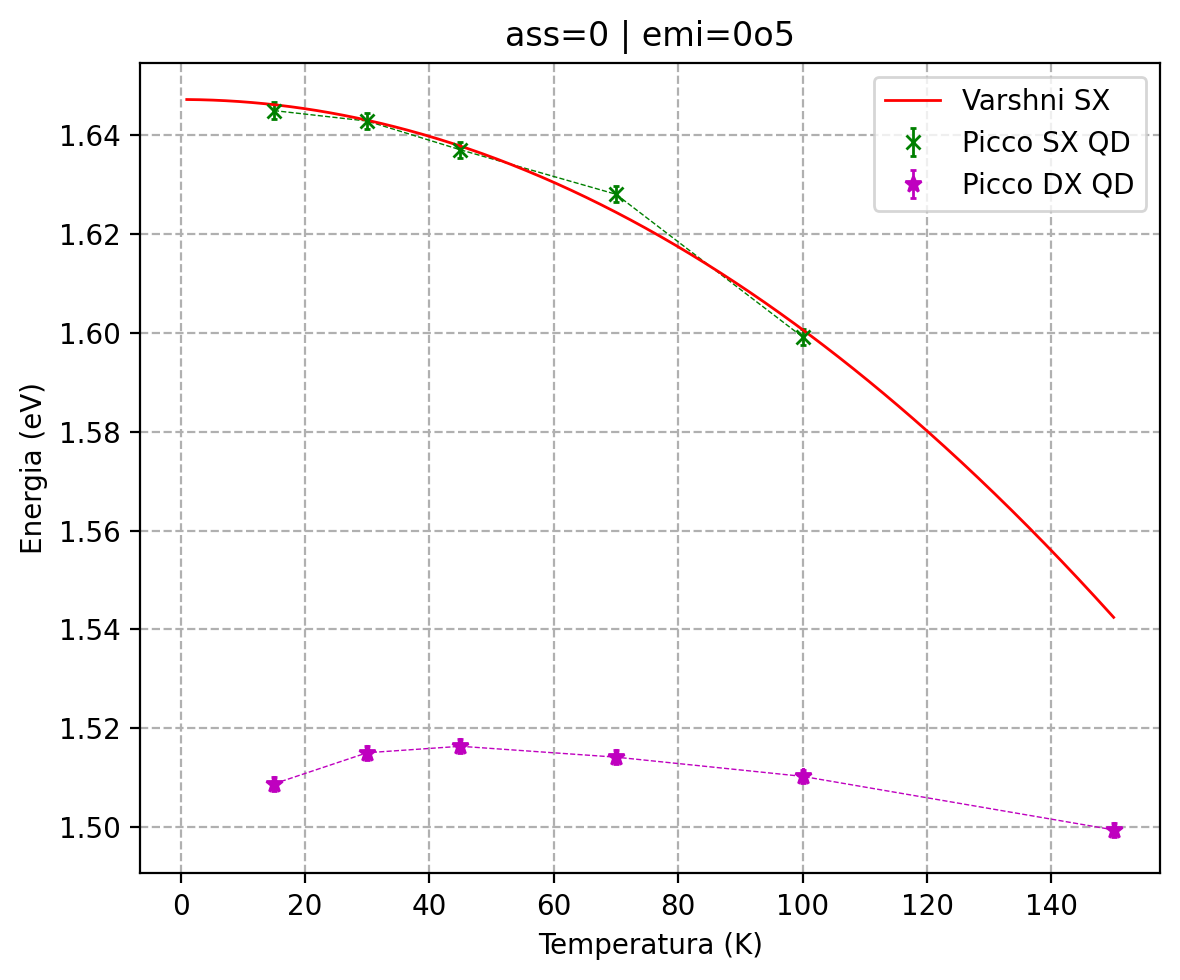

Parametri fit picco SX:
E_0 = 1.6472558537338262 ± 0.0010343481416719238 ; alpha = 209.62597526769758 ± 8.892399546669244 ; beta = 44989307.77086907 ± 4.143370754499106e-05
• Chi quadro: 6.844
• Gradi di libertà: 2
• Chi quadro ridotto: 3.422
• p-value: 3.264e-02


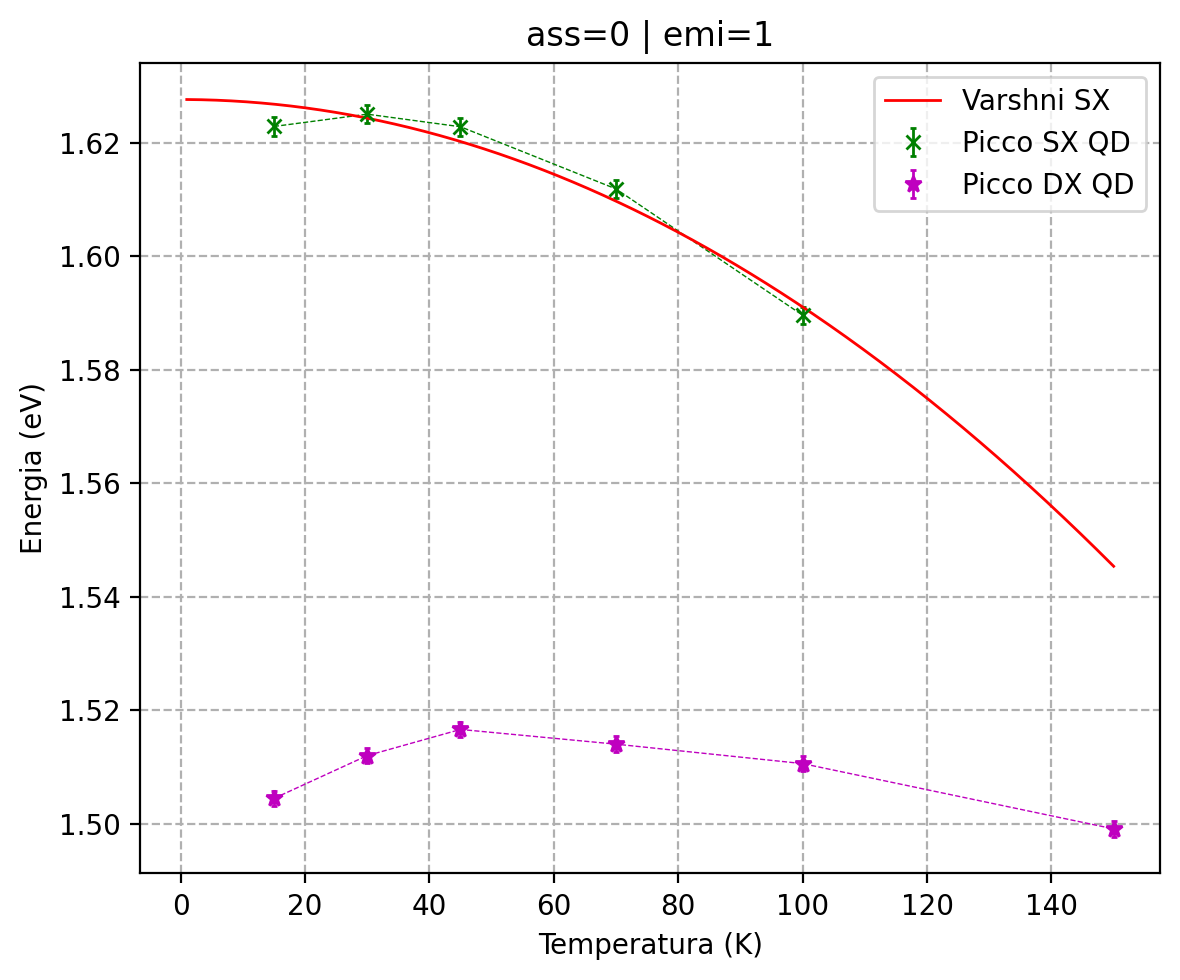

Parametri fit picco SX:
E_0 = 1.6276456375986097 ± 0.00101165282271352 ; alpha = 245.18564845745286 ± 13.041062376556958 ; beta = 67063018.35712178 ± 4.767866879428028e-05
• Chi quadro: 11.714
• Gradi di libertà: 2
• Chi quadro ridotto: 5.857
• p-value: 2.860e-03


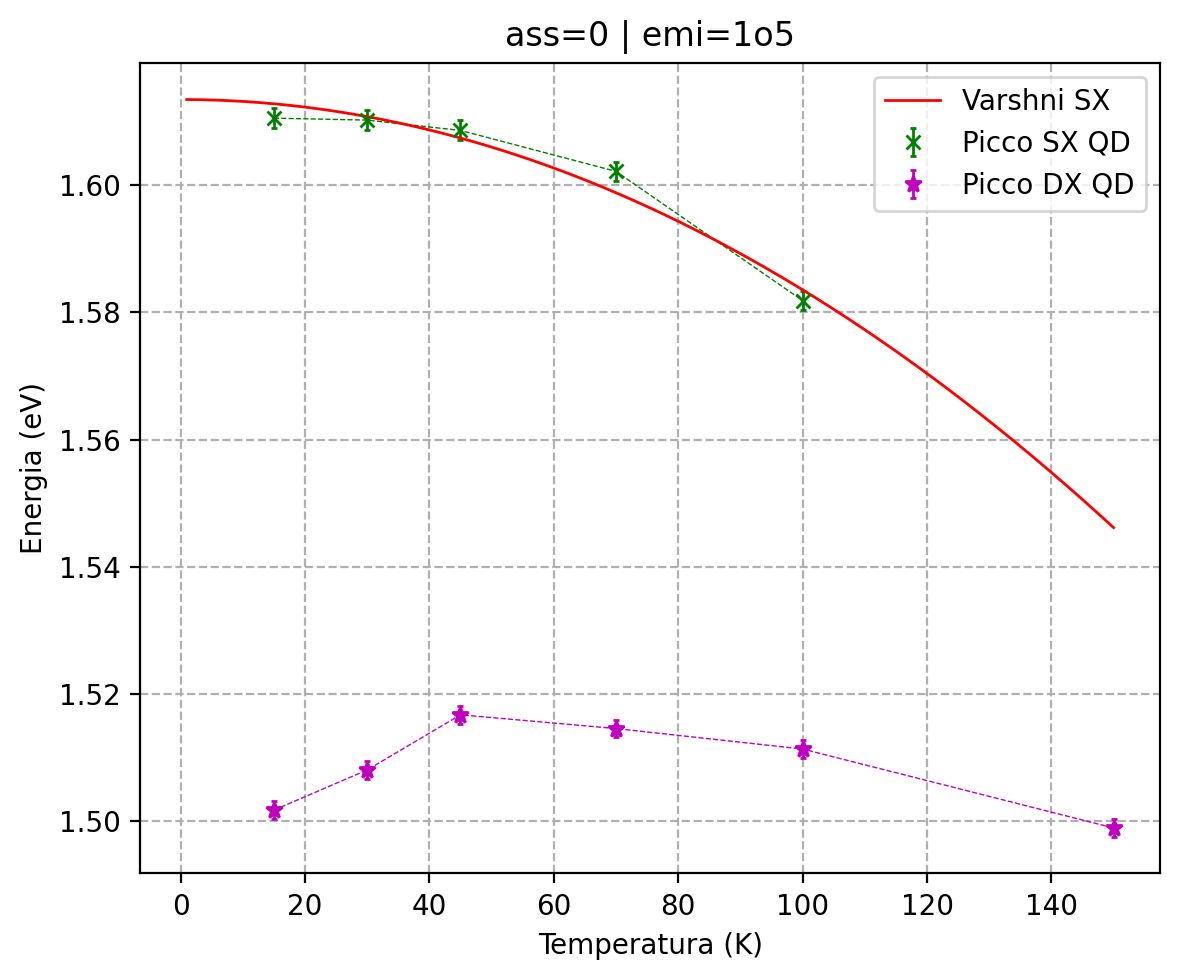

Parametri fit picco SX:
E_0 = 1.6134952754859115 ± 0.0009953908171014237 ; alpha = 220.35043549981592 ± 14.138684563810214 ; beta = 73598224.84554714 ± 4.233062836539274e-05
• Chi quadro: 8.704
• Gradi di libertà: 2
• Chi quadro ridotto: 4.352
• p-value: 1.288e-02


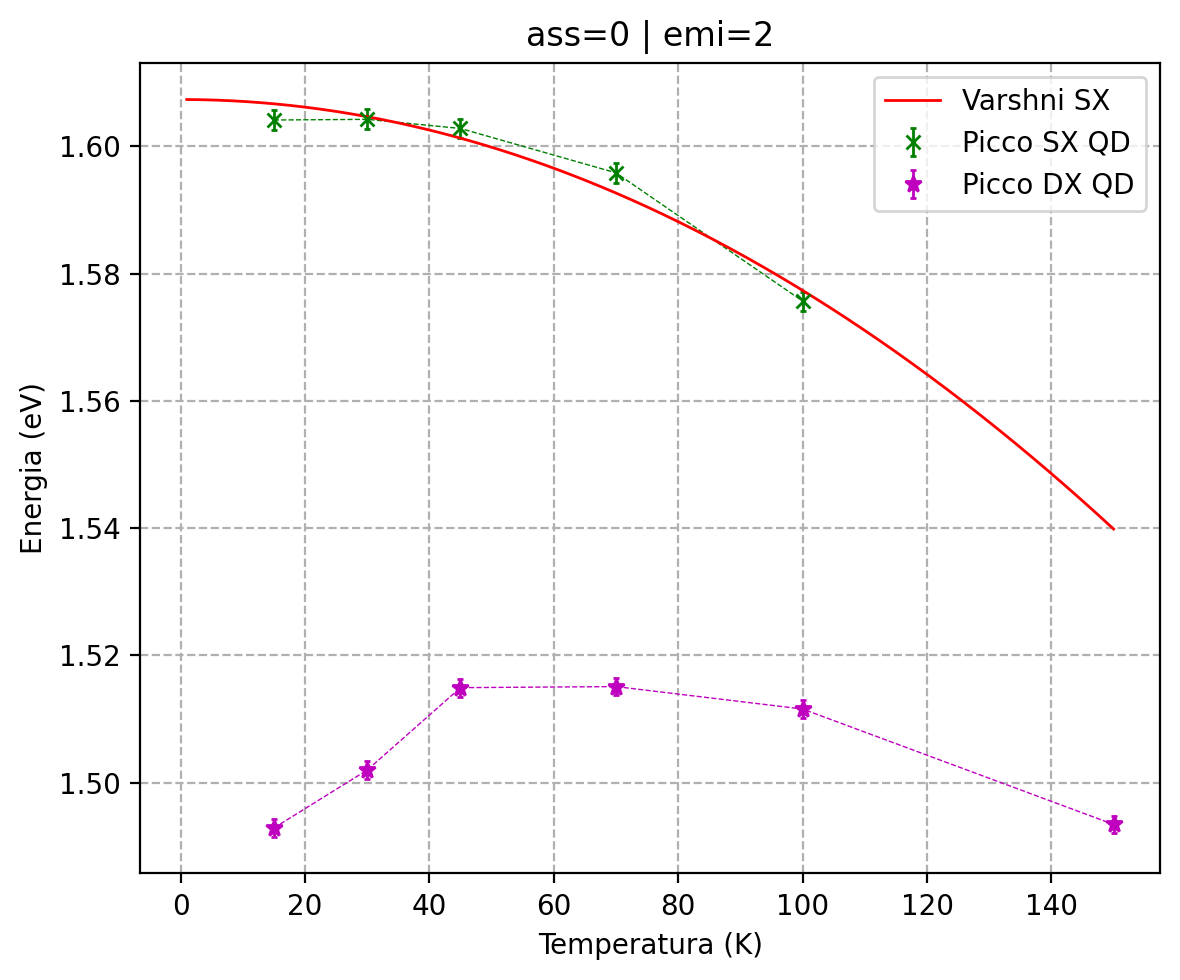

Parametri fit picco SX:
E_0 = 1.6073417275487947 ± 0.0009877673566614455 ; alpha = 107.77245985551487 ± 6.849033781923517 ; beta = 35931752.23308398 ± 2.054269725983481e-05
• Chi quadro: 9.183
• Gradi di libertà: 2
• Chi quadro ridotto: 4.592
• p-value: 1.014e-02


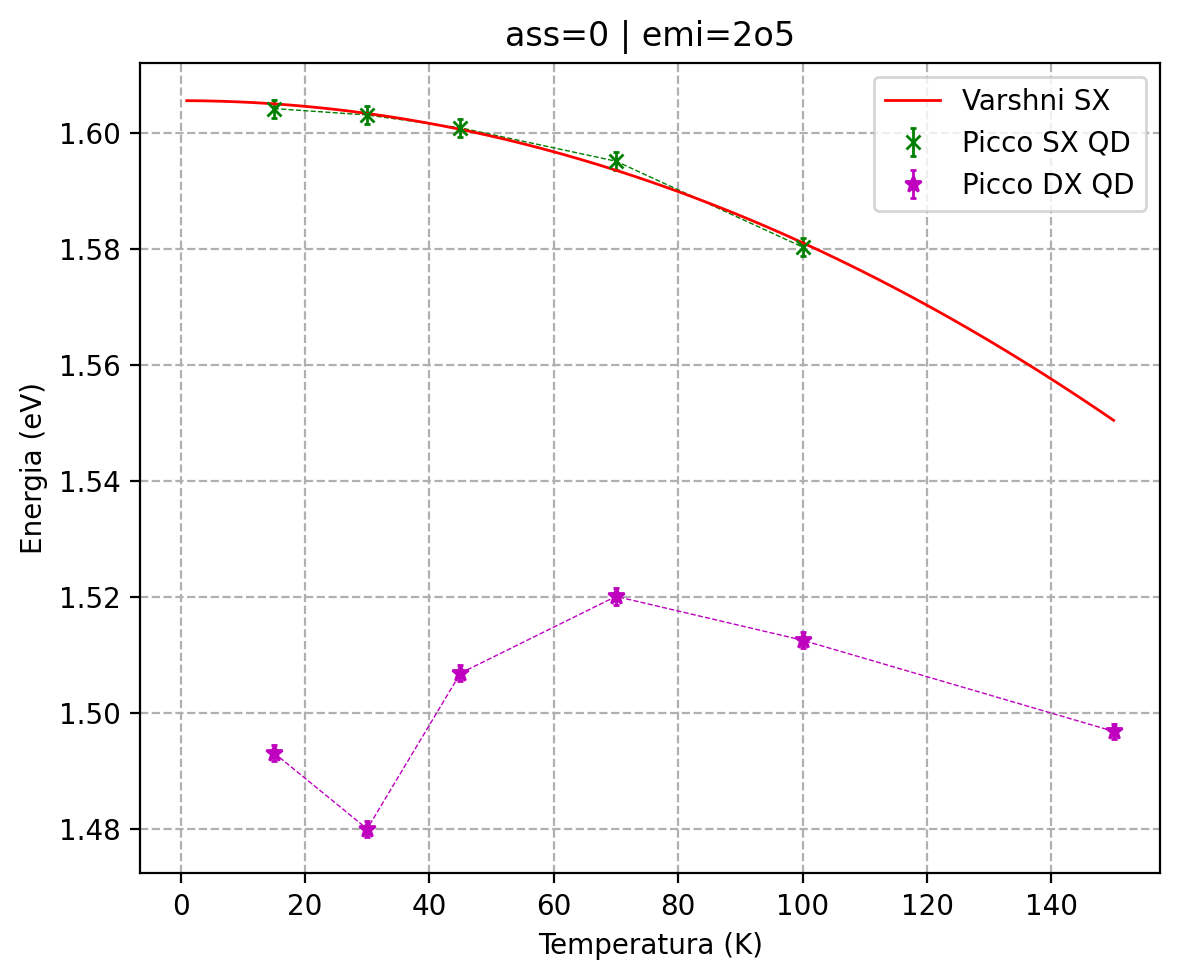

Parametri fit picco SX:
E_0 = 1.6055318164440733 ± 0.0009871701209831119 ; alpha = 154.75885301066765 ± 12.081705300664662 ; beta = 63166222.21341971 ± 2.9600432606640663e-05
• Chi quadro: 1.609
• Gradi di libertà: 2
• Chi quadro ridotto: 0.804
• p-value: 4.474e-01


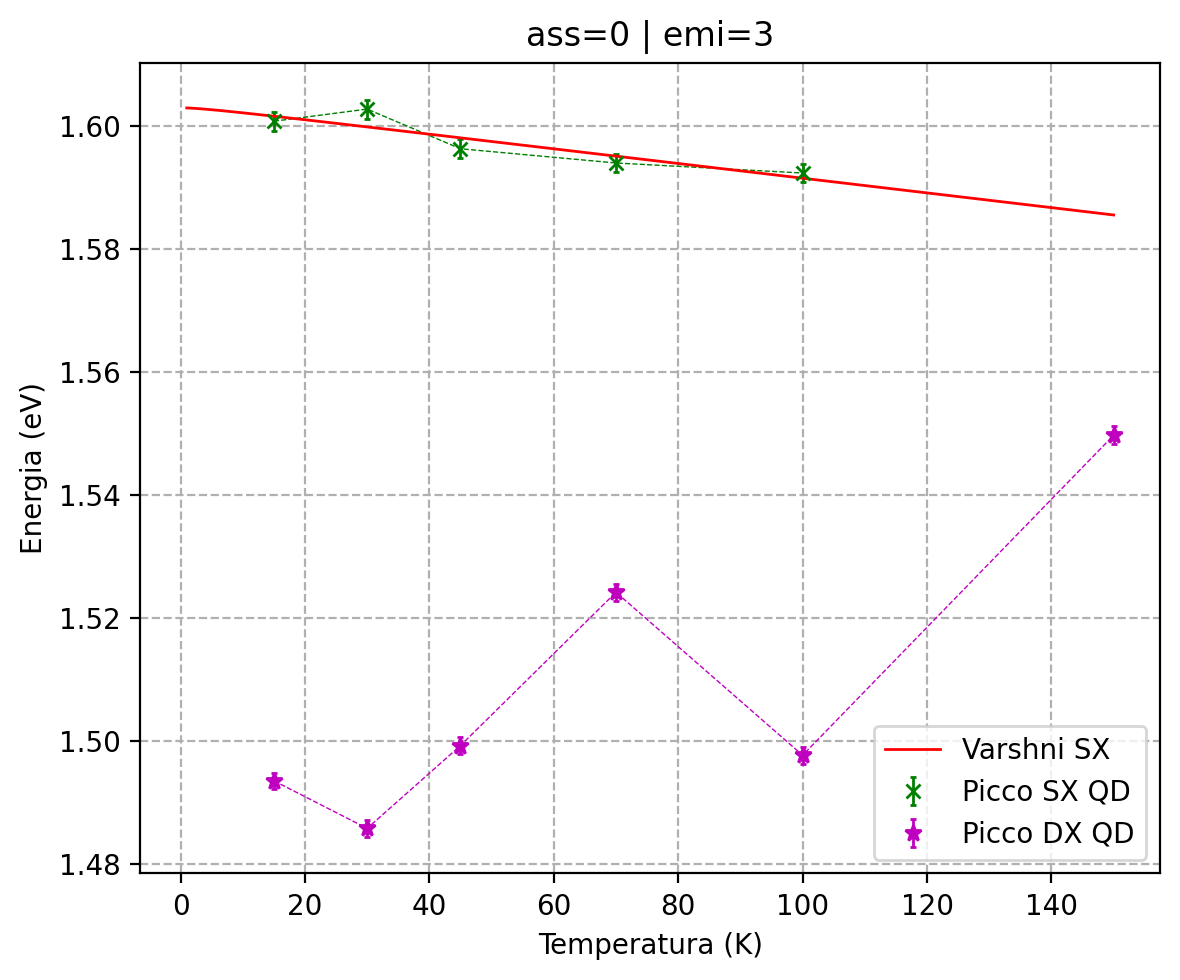

Parametri fit picco SX:
E_0 = 1.6029328376553758 ± 0.00829497168950777 ; alpha = 0.00011984951414294436 ± 5.231314888604066e-05 ; beta = 4.700786868191904 ± 110.57216417073168
• Chi quadro: 5.903
• Gradi di libertà: 2
• Chi quadro ridotto: 2.951
• p-value: 5.226e-02


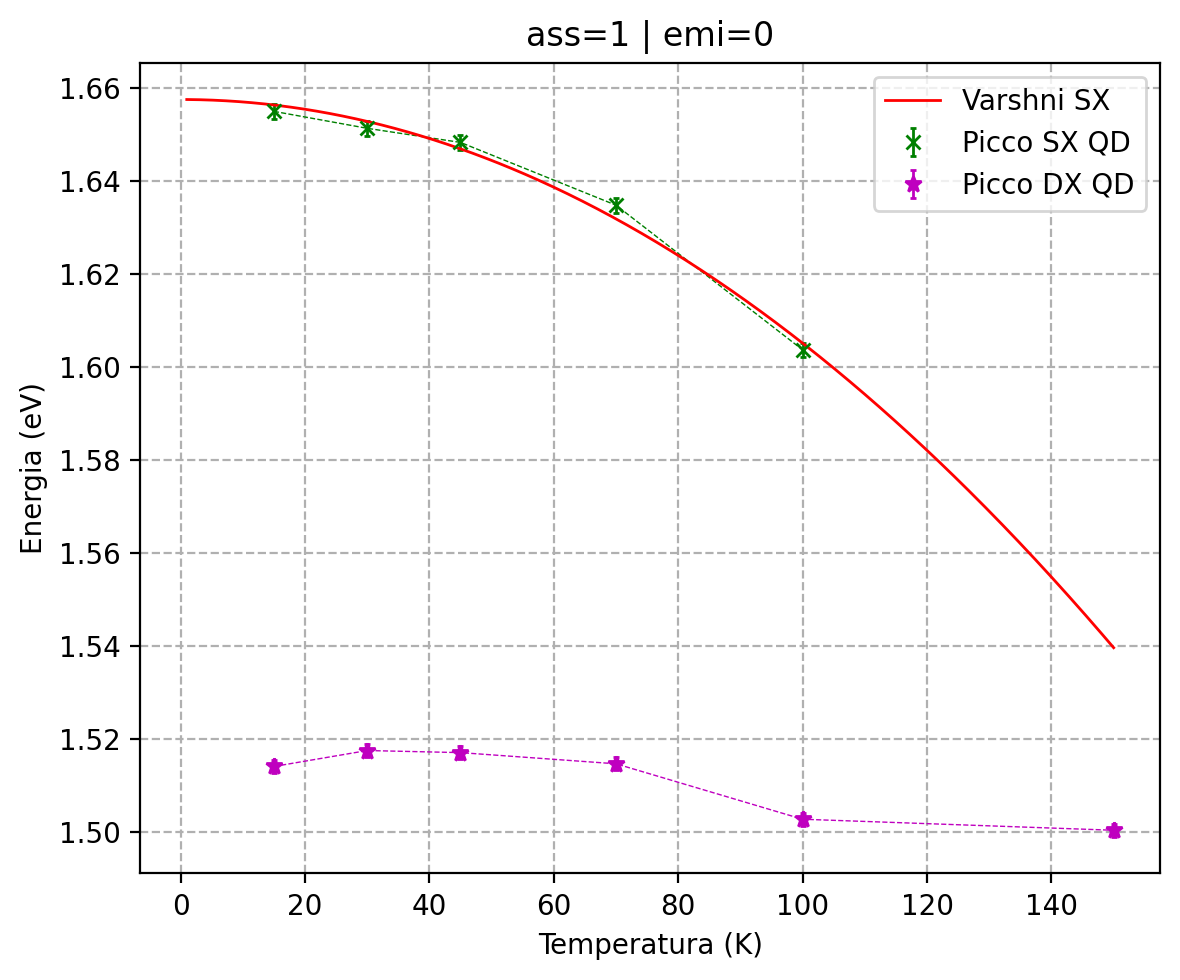

Parametri fit picco SX:
E_0 = 1.6574788017056274 ± 0.0010460238263995448 ; alpha = 455.51480453689135 ± 17.315916390729576 ; beta = 86933337.1906786 ± 9.073215538799355e-05
• Chi quadro: 6.355
• Gradi di libertà: 2
• Chi quadro ridotto: 3.178
• p-value: 4.169e-02


In [87]:
for ass in d_o_ass:
    ass = 'ass=' + ass 
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        emi = 'emi=' + emi
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(6, 5), dpi=200)
        
        # Plot del primo picco (fit?)
        plt.errorbar(x1, y1, yerr=err_y1, fmt='gx', label='Picco SX QD', markersize=5, elinewidth=1, capsize=1)
        plt.plot(x1, y1, linestyle='--', color='g', linewidth=0.5) # unisce i punti
        # Fit del primo picco - curva verde
        popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        # plot fit
        plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Varshni SX')
        
        # Plot del secondo picco (no fit)
        plt.errorbar(x2, y2, yerr=err_y2, fmt='m*', label='Picco DX QD', markersize=6, elinewidth=1, capsize=1)
        plt.plot(x2, y2, linestyle='--', color='m', linewidth=0.5) # unisce i punti

        # Aggiungere etichette e legenda
        # HACK: ho invertito emi e ass, vedo di sistemarla così: li inverto poi li ri-inverto
        help = emi
        emi = ass
        ass = help
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()
        # ri-inverto
        ass = emi
        emi = help

        # Mostrare il grafico
        plt.tight_layout()
        plt.show()
    
        
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        # Errori sui parametri
        perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")   
        

### Stampa E_0

In [88]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [89]:
arr_e_0_sx

[]

#### Errori E_0 SX

In [90]:
arr_err_e_0_sx

[]

#### E_0 ricavati da Picco DX

In [91]:
arr_e_0_dx

[]

#### Errori E_0 DX

In [92]:
arr_err_e_0_dx

[]

Provo a calcolare il chi-quadro di questi valori; il residuo sarà la distanza dalla media pesata. N-1 gradi di libertà. (N=6)

In [93]:
'''# media pesata
m_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)
err_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))
m_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)
err_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))
print('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)

# la media pesata non è un valore esatto
# Errore totale considerando anche l'errore sulla media
sigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)
sigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)

# residui
residui_sx = arr_e_0_sx - m_p_sx
chi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)
residui_dx = arr_e_0_dx - m_p_dx
chi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)

# chi quadro ridotti
chi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)
chi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)'''

"# media pesata\nm_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)\nerr_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))\nm_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)\nerr_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))\nprint('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)\n\n# la media pesata non è un valore esatto\n# Errore totale considerando anche l'errore sulla media\nsigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)\nsigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)\n\n# residui\nresidui_sx = arr_e_0_sx - m_p_sx\nchi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)\nresidui_dx = arr_e_0_dx - m_p_dx\nchi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)\n\n# chi quadro ridotti\nchi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)\nchi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)"